##### Dataset

In [2]:
# SMSSpamCollection
# https://mitu.co.in/dataset

##### Import the libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Load the dataset

In [6]:
df = pd.read_csv('datasets/SMSSpamCollection', sep = '\t', names=['label','text'])

In [7]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


##### Separate the input and output data

In [11]:
x = df['text']
y = df['label']

##### Explore the data

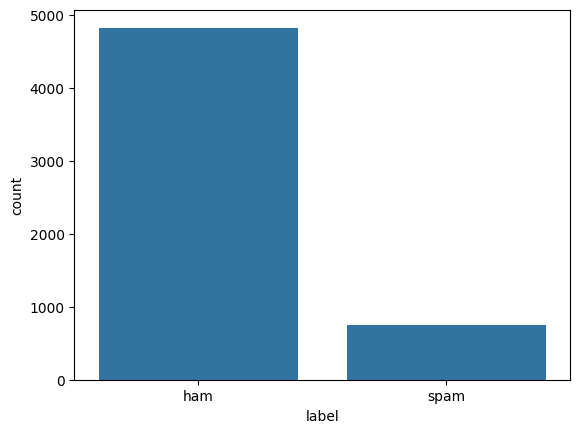

In [12]:
sns.countplot(x = y);

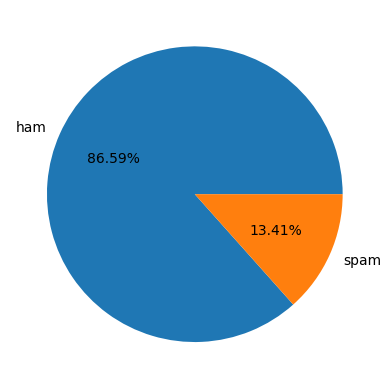

In [13]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');

##### Install nltk

In [15]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
import nltk
nltk.download('punkt')  
nltk.download('punkt_tab')   # Tokenization
nltk.download('stopwords')   # collection of stopwords

[nltk_data] Downloading package punkt to /home/mitu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/mitu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/mitu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##### Text Pre-processing

In [22]:
# Tokenization
from nltk.tokenize import word_tokenize

In [19]:
sent = 'Hello friends! How are you? Welcome to world of Python Programming.'

In [20]:
tokens1 = word_tokenize(sent)

In [21]:
tokens1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'Welcome',
 'to',
 'world',
 'of',
 'Python',
 'Programming',
 '.']

In [23]:
# Punctuation Removal

In [24]:
tokens2 = []
for word in tokens1:
    if word.isalpha():
        tokens2.append(word)

In [25]:
tokens2

['Hello',
 'friends',
 'How',
 'are',
 'you',
 'Welcome',
 'to',
 'world',
 'of',
 'Python',
 'Programming']

In [26]:
tokens2 = [word for word in tokens1 if word.isalpha()]
tokens2

['Hello',
 'friends',
 'How',
 'are',
 'you',
 'Welcome',
 'to',
 'world',
 'of',
 'Python',
 'Programming']

In [27]:
# Remove stopwords
from nltk.corpus import stopwords
swords = stopwords.words('english')
swords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
tokens3 = []
for word in tokens2:
    if word.lower() not in swords:
        tokens3.append(word.lower())

In [31]:
tokens3

['hello', 'friends', 'welcome', 'world', 'python', 'programming']

In [32]:
tokens3 = [word.lower() for word in tokens2 if word.lower() not in swords]

In [33]:
tokens3

['hello', 'friends', 'welcome', 'world', 'python', 'programming']

In [34]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [word for word in tokens1 if word.isalpha()]
    tokens3 = [word.lower() for word in tokens2 if word.lower() not in swords]
    return tokens3

In [35]:
clean_text(sent)

['hello', 'friends', 'welcome', 'world', 'python', 'programming']

In [36]:
sent1 = 'It was not expected from them. They completed the wrong task.'
clean_text(sent1)

['expected', 'completed', 'wrong', 'task']

In [37]:
x.apply(clean_text)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3           [u, dun, say, early, hor, u, c, already, say]
4          [nah, think, goes, usf, lives, around, though]
                              ...                        
5567    [time, tried, contact, u, pound, prize, claim,...
5568                   [ü, b, going, esplanade, fr, home]
5569                            [pity, mood, suggestions]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

##### Explore the words

In [39]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [41]:
spam = x[y == 'spam']
ham = x[y == 'ham']

In [44]:
spam.shape

(747,)

In [45]:
ham.shape

(4825,)

In [51]:
spam_messages = ' '.join(spam)
ham_messages = ' '.join(ham)

In [52]:
from wordcloud import WordCloud

In [60]:
wcloud = WordCloud().generate(text=spam_messages)

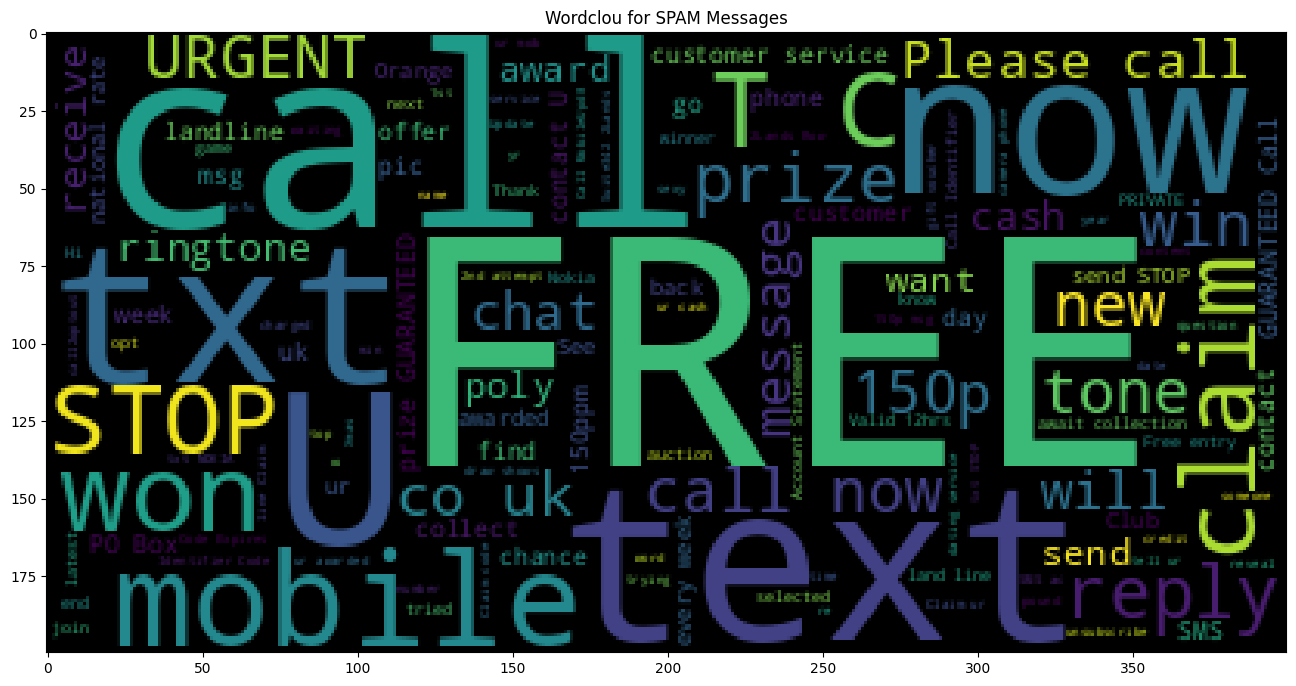

In [61]:
plt.figure(figsize=(16,9))
plt.title('Wordclou for SPAM Messages')
plt.imshow(wcloud)

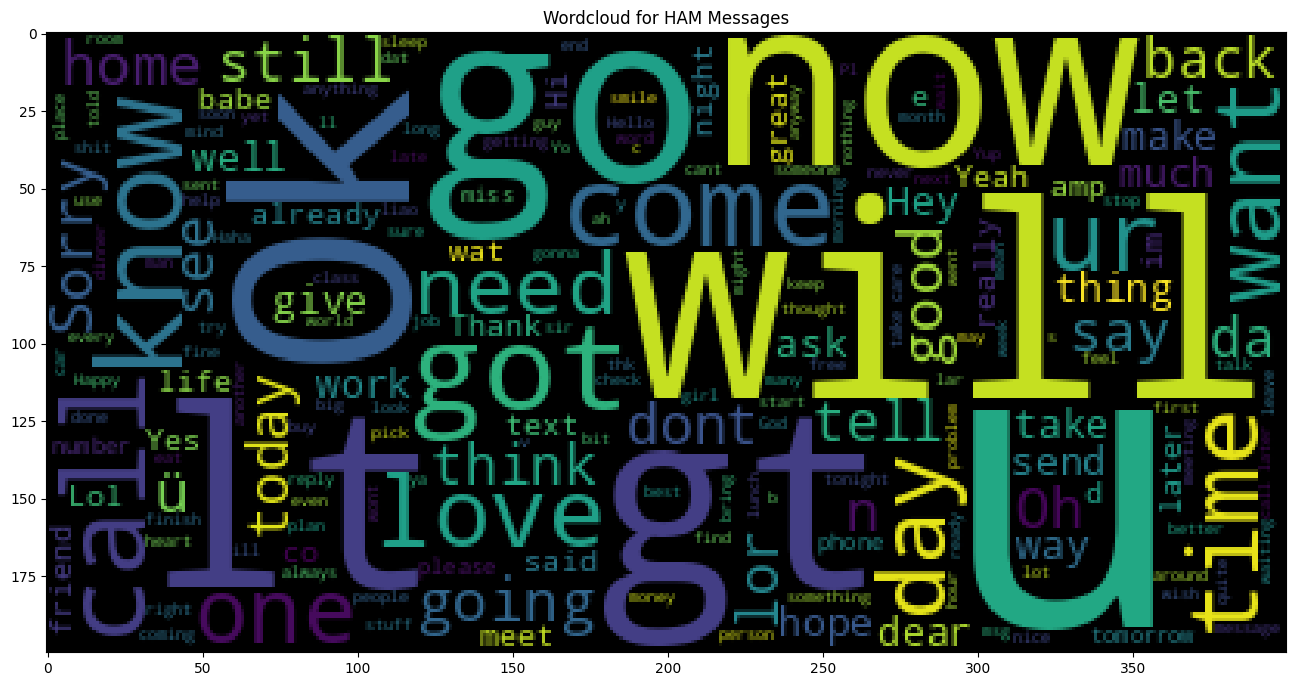

In [65]:
wcloud = WordCloud().generate(text=ham_messages)
plt.figure(figsize=(16,9))
plt.title('Wordcloud for HAM Messages')
plt.imshow(wcloud)

###### TF*IDF Vectorization

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
vectorizer = TfidfVectorizer(analyzer=clean_text)

In [70]:
x_new = vectorizer.fit_transform(x)

In [71]:
x_new.shape

(5572, 7217)

In [72]:
x_new.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
vectorizer.get_feature_names_out()

array(['aa', 'aah', 'aaniye', ..., 'zyada', 'é', 'ü'], dtype=object)

##### Cross-Validation

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state=0)

In [76]:
x_train.shape

(4179, 7217)

In [77]:
x_test.shape

(1393, 7217)

##### Build the model

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rforest = RandomForestClassifier(random_state=0, n_estimators=20)

In [81]:
rforest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

##### Performance Evaluation

In [83]:
y_pred = rforest.predict(x_test)

In [84]:
from sklearn.metrics import accuracy_score, classification_report

In [85]:
accuracy_score(y_test, y_pred)

0.9763101220387652

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1208
        spam       1.00      0.82      0.90       185

    accuracy                           0.98      1393
   macro avg       0.99      0.91      0.94      1393
weighted avg       0.98      0.98      0.98      1393



In [92]:
sent1 = 'Hello friends! How are you? Welcome to world of Python Programming.'
sent2 = 'Hello! You are awarded with free bonus of 2000!'

In [93]:
new = vectorizer.transform([sent1, sent2])

In [94]:
new.shape

(2, 7217)

In [95]:
rforest.predict(new)

array(['ham', 'ham'], dtype=object)

In [91]:
# sample.csv

In [96]:
file = open('datasets/sample.csv')
text = file.readlines()

In [97]:
text

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']

In [100]:
tlines = vectorizer.transform(text)
tlines.shape

(3, 7217)

In [101]:
rforest.predict(tlines)

array(['ham', 'spam', 'ham'], dtype=object)